In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

In [4]:
print(xtrain.shape)

(60000, 28, 28)


In [5]:
np.isnan(xtrain).any()

np.False_

In [6]:
input_shape = (28,28,1)

# method 1
xtrain = np.expand_dims(xtrain,-1)
xtrain = xtrain/255.0

# method 2
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], xtest.shape[2], 1)
xtest = xtest/255.0

print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


9


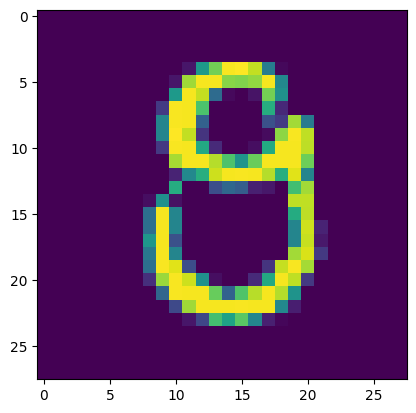

In [7]:
plt.imshow(xtrain[80][:,:,0])
print(ytrain[80])

In [8]:
class Early_stop(tf.keras.callbacks.Callback) :
    def on_epoch_end(self, epoch, logs = None) :
        if logs["accuracy"] >= 0.995 :
            self.model.stop_training = True
            print("\n Reached 99.5 percent accuracy")

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape = (input_shape)),
    
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

In [10]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [11]:
model.fit(xtrain, ytrain, epochs = 10,
          callbacks = [Early_stop()])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9057 - loss: 0.3132
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9845 - loss: 0.0501
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9910 - loss: 0.0292
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9932 - loss: 0.0209
Epoch 5/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9957 - loss: 0.0146
 Reached 99.5 percent accuracy
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9957 - loss: 0.0146


In [12]:
model_test = model.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9834 - loss: 0.0560
